In [1]:
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
from matplotlib.colors import Normalize, PowerNorm
import time
%matplotlib inline

In [2]:
url = f'https://www.parkrun.ru/results/largestclubs/'
page_all_results = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})

In [3]:
data = pd.read_html(page_all_results.text)[0]

In [4]:
data

,Клуб,Unnamed: 1,Число участников,Число пробежек,Сайт
0,Бег с удовольствием,NaN,1026,3119,Бег с удовольствием home page
1,ТТЖТ,NaN,663,2159,ТТЖТ home page
2,adidas runners,NaN,617,7422,adidas runners home page
3,I Love Running,NaN,611,1870,I Love Running home page
4,Nike+ Running Club Moscow,NaN,234,749,Nike+ Running Club Moscow home page
5,Wake&Run,NaN,193,6808,Wake&Run home page
6,NovgorodRun,NaN,164,1819,NovgorodRun home page
7,Orienta-Kuncevo,NaN,130,2853,Orienta-Kuncevo home page
8,Dmitry Erokhin Squad,NaN,108,1049,Dmitry Erokhin Squad home page
9,Сосновка,NaN,105,7859,Сосновка home page


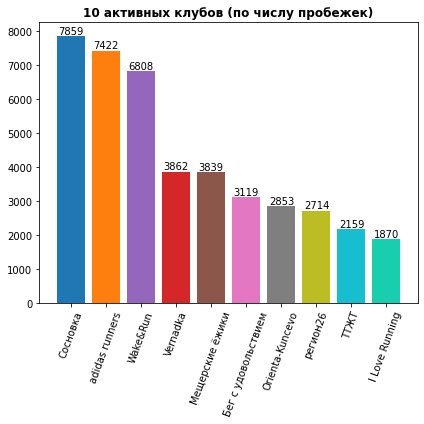

In [5]:
df = data.sort_values(by=[data.columns[3]], ascending=False).reset_index(drop=True).head(10)
clubs = df[data.columns[0]]
vals = df[data.columns[3]].values

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#17ceaf']
# ax.grid(False, axis='x')
# ax.yaxis.set_major_locator(MaxNLocator(2, 10, 50, 100, 200, 500))
plt.xticks(rotation=70)
plt.bar(clubs, height=vals, color=colors)
for p, label, mark in zip(ax.patches, vals, clubs.values):
    if mark == 'Wake&Run':
        p.set_facecolor('#9467bd')
    ax.annotate(label, (p.get_x()+0.05, p.get_height()), va='bottom')
plt.title('10 активных клубов (по числу пробежек)', fontweight='bold')
plt.tight_layout()

In [16]:
club_id = 24630
parkrun = 'Kuzminki'

In [17]:
url = f'https://www.parkrun.ru/{parkrun}/results/clubhistory/?clubNum={club_id}'
club_results = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
df = pd.read_html(club_results.text)[0]

In [20]:
df['Паркран'] = parkrun

In [21]:
df.iloc[:, [0,2,3,4,10,11,13]]

Unnamed: 0_level_0  Время                  Число    Всего   Паркран
                Участник  Лучш. Средн.  Худш. Пробежки Пробежки          
0        Dmitry MARTYNOV  17:05  17:32  18:16        3      241  Kuzminki
1           Федор ОСИПОВ  17:56  22:14  33:00       44       72  Kuzminki
2  Алексей КОЛОКОЛЬНИКОВ  18:12  20:45  26:14        4       83  Kuzminki
3         Дмитрий ПЕТРОВ  18:21  21:09  24:18       10      233  Kuzminki
4         Алексей АКИНИН  19:28  19:28  19:28        1      197  Kuzminki
5       Николай ТЕЛЕПЕНЬ  19:37  20:46  22:50       27      138  Kuzminki
6       Людмила ХОДАКОВА  19:53  24:20  41:18        7      185  Kuzminki
7            Роман ЗЕНОВ  20:27  21:47  24:18        5      140  Kuzminki
8        Диана МАРТЫНОВА  20:44  21:22  22:15        3      165  Kuzminki
9          Сергей ИВАНОВ  25:14  33:16  41:19        2       57  Kuzminki

In [22]:
russian_parkruns = pd.read_csv('russian_parkruns.csv')

In [23]:
dfs = []

In [24]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0  Время                \
                Участник Unnamed: 1_level_1  Лучш. Средн.  Худш.   
0        Dmitry MARTYNOV                NaN  17:05  17:32  18:16   
1           Федор ОСИПОВ                NaN  17:56  22:14  33:00   
2  Алексей КОЛОКОЛЬНИКОВ                NaN  18:12  20:45  26:14   
3         Дмитрий ПЕТРОВ                NaN  18:21  21:09  24:18   
4         Алексей АКИНИН                NaN  19:28  19:28  19:28   
5       Николай ТЕЛЕПЕНЬ                NaN  19:37  20:46  22:50   
6       Людмила ХОДАКОВА                NaN  19:53  24:20  41:18   
7            Роман ЗЕНОВ                NaN  20:27  21:47  24:18   
8        Диана МАРТЫНОВА                NaN  20:44  21:22  22:15   
9          Сергей ИВАНОВ                NaN  25:14  33:16  41:19   

  Unnamed: 5_level_0 Рейтинги                   Unnamed: 9_level_0    Число  \
  Unnamed: 5_level_1    Лучш.   Средн.    Худш. Unnamed: 9_level_1 Пробежки   
0                NaN  75.90 %  73.74 %  70.62 %                NaN        3   
1                NaN  73.98 %  61.18 %  39.75 %                NaN       44   
2                NaN  70.88 %  63.46 %  49.24 %                NaN        4   
3                NaN  76.11 %  64.41 %  55.76 %                NaN       10   
4                NaN  66.35 %  66.35 %  66.35 %                NaN        1   
5                NaN  66.27 %  62.67 %  57.15 %                NaN       27   
6                NaN  74.60 %  64.89 %  36.32 %                NaN        7   
7                NaN  63.81 %  60.22 %  53.98 %                NaN        5   
8                NaN  71.38 %  69.29 %  66.52 %                NaN        3   
9                NaN  51.98 %  42.04 %  32.11 %                NaN        2   

     Всего              Паркран  
  Пробежки Пробежки.1            
0      241        NaN  Kuzminki  
1       72        NaN  Kuzminki  
2       83        NaN  Kuzminki  
3      233        NaN  Kuzminki  
4      197        NaN  Kuzminki  
5      138        NaN  Kuzminki  
6      185        NaN  Kuzminki  
7      140        NaN  Kuzminki  
8      165        NaN  Kuzminki  
9       57        NaN  Kuzminki

In [14]:
for i, row in russian_parkruns.iterrows():
    parkrun = row['Parkrun'].replace(' ', '')
    url = f'https://www.parkrun.ru/{parkrun}/results/clubhistory/?clubNum={club_id}'
    club_results = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})
    df = pd.read_html(club_results.text)[0]
    df['Паркран'] = row['Parkrun']
    dfs.append(df.iloc[:, [0,2,3,4,10,11,13]])
    time.sleep(2)

KeyError: 'Parkrun'

In [76]:
df_all = pd.concat(dfs)

In [77]:
df_all.columns = ['name', 'best', 'avr', 'worst', 'num', 'num_total', 'parkrun']

In [78]:
df_all

,name,best,avr,worst,num,num_total,parkrun
0,Dmitry MARTYNOV,17:58,17:58,17:58,1,214,Angarskie Prudy
1,Людмила ХОДАКОВА,21:05,21:05,21:05,1,161,Angarskie Prudy
0,Dmitry MARTYNOV,18:10,18:10,18:10,1,214,Babushkinsky na Yauze
1,Николай ТЕЛЕПЕНЬ,20:37,20:37,20:37,1,126,Babushkinsky na Yauze
2,Денис МАЯКОВ,21:02,21:02,21:02,1,2,Babushkinsky na Yauze
3,Диана МАРТЫНОВА,22:50,22:50,22:50,1,146,Babushkinsky na Yauze
4,Роман ЗЕНОВ,29:17,29:17,29:17,1,122,Babushkinsky na Yauze
0,Dmitry MARTYNOV,19:12,19:45,20:19,2,214,Balashikha Zarechnaya
1,Людмила ХОДАКОВА,19:29,19:29,19:29,1,161,Balashikha Zarechnaya
2,Николай ТЕЛЕПЕНЬ,20:08,20:57,21:38,3,126,Balashikha Zarechnaya


In [81]:
df_all.groupby('name')['parkrun'].count()

name
Dmitry MARTYNOV          11
Gleb KONDRATENKO          3
Алексей АКИНИН            2
Алексей КОЛОКОЛЬНИКОВ     3
Алексей НЕСТЕРОВ          1
Денис МАЯКОВ              1
Диана МАРТЫНОВА           7
Дмитрий ПЕТРОВ            6
Константин ВАНАГ          1
Людмила ХОДАКОВА         11
Надежда ШЕМЯКИНА          2
Николай ТЕЛЕПЕНЬ          6
Ольга ЩУКИНА              1
Роман ЗЕНОВ               2
Федор ОСИПОВ              2
Юрий СИМОНОВ              1
Name: parkrun, dtype: int64

In [80]:
df_all['name'].unique()

array(['Dmitry MARTYNOV', 'Людмила ХОДАКОВА', 'Николай ТЕЛЕПЕНЬ',
       'Денис МАЯКОВ', 'Диана МАРТЫНОВА', 'Роман ЗЕНОВ',
       'Алексей КОЛОКОЛЬНИКОВ', 'Ольга ЩУКИНА', 'Дмитрий ПЕТРОВ',
       'Gleb KONDRATENKO', 'Федор ОСИПОВ', 'Юрий СИМОНОВ',
       'Константин ВАНАГ', 'Надежда ШЕМЯКИНА', 'Алексей НЕСТЕРОВ',
       'Алексей АКИНИН'], dtype=object)

In [82]:
df_all.reset_index(drop=True)

,name,best,avr,worst,num,num_total,parkrun
0,Dmitry MARTYNOV,17:58,17:58,17:58,1,214,Angarskie Prudy
1,Людмила ХОДАКОВА,21:05,21:05,21:05,1,161,Angarskie Prudy
2,Dmitry MARTYNOV,18:10,18:10,18:10,1,214,Babushkinsky na Yauze
3,Николай ТЕЛЕПЕНЬ,20:37,20:37,20:37,1,126,Babushkinsky na Yauze
4,Денис МАЯКОВ,21:02,21:02,21:02,1,2,Babushkinsky na Yauze
5,Диана МАРТЫНОВА,22:50,22:50,22:50,1,146,Babushkinsky na Yauze
6,Роман ЗЕНОВ,29:17,29:17,29:17,1,122,Babushkinsky na Yauze
7,Dmitry MARTYNOV,19:12,19:45,20:19,2,214,Balashikha Zarechnaya
8,Людмила ХОДАКОВА,19:29,19:29,19:29,1,161,Balashikha Zarechnaya
9,Николай ТЕЛЕПЕНЬ,20:08,20:57,21:38,3,126,Balashikha Zarechnaya
